#### Copyright 2020 Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Machine Learning with Scikit Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/"

## Regression

In [3]:
df = pd.read_csv(url + 'weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


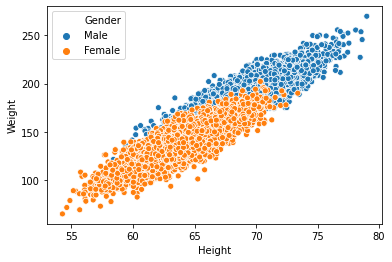

In [5]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender');

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Height']].values
y = df['Weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.score(X_train, y_train)

0.8544074009765417

In [10]:
model.score(X_test, y_test)

0.8581952493935256

### Exercise 1

More features: `sqft`, `bdrms`, `age`, `price`

- replace the dataset above with `housing-data.csv`
- adapt the code so that there are no errors:
    - plot it using `sns.pairplot`
    - add more columns in the feature definition `X = ...`
- train and evaluate the model
- bonus points if you try with a different model like `Ridge` or `Lasso`

In [11]:
df1=pd.read_csv(url+ "housing-data.csv")

In [12]:
df1.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


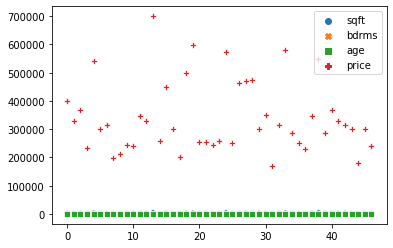

In [14]:
sns.scatterplot(data=df1)

In [15]:
X = df1.drop('price', axis=1).values
y = df1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.score(X_train, y_train)

0.7411959910367354

In [18]:
model.score(X_test, y_test)

0.6497683467924655

In [19]:
#trying out new algorithm (ridge)
from sklearn.linear_model import Ridge

In [20]:
model = Ridge()
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
model.score(X_train, y_train)

0.7411956716588293

In [22]:
model.score(X_test, y_test)

0.6496289515619813

In [23]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
model.score(X_train, y_train)


0.7411959908226102

In [26]:
model.score(X_test, y_test)

0.6497648855691067

## Classification

In [27]:
df = pd.read_csv(url + 'isp_data.csv')

In [28]:
df.head()

,download,upload,label
0,2.373546,5.398106,0
1,3.183643,4.387974,0
2,2.164371,5.341120,0
3,4.595281,3.870637,0
4,3.329508,6.433024,0


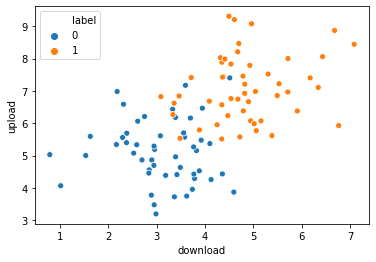

In [29]:
sns.scatterplot(data=df, x='download', y='upload', hue='label');

In [30]:
X = df[['download', 'upload']].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [32]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
model.score(X_train, y_train)

0.95

In [34]:
model.score(X_test, y_test)

0.95

In [35]:
y_pred = model.predict(X)

In [36]:
confusion_matrix(y, y_pred)

array([[49,  1],
       [ 4, 46]])

In [37]:
wrong_pred = X[y != y_pred]

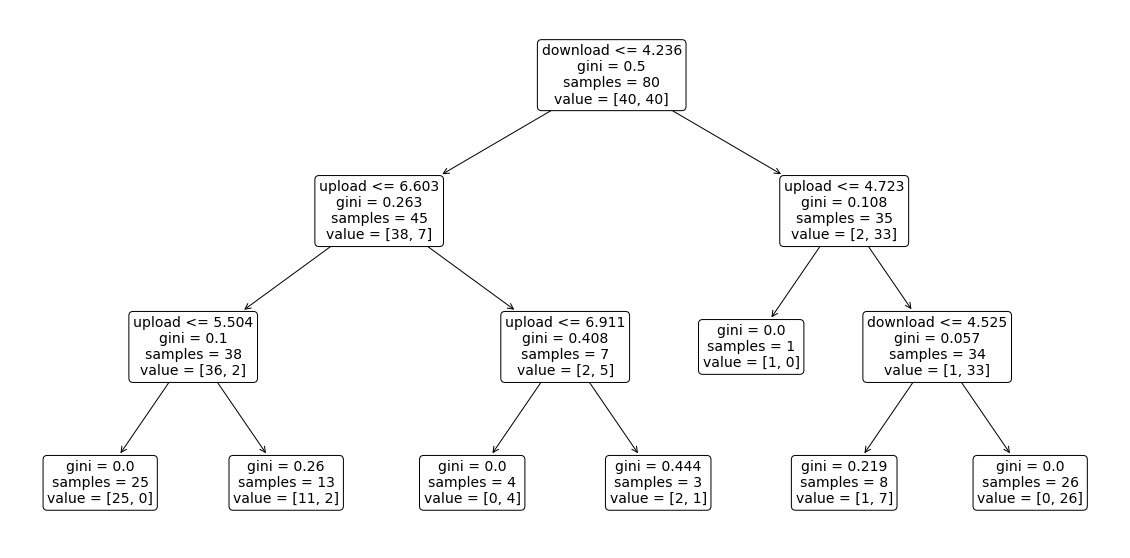

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(model, fontsize=14, ax=ax, rounded=True, feature_names=['download', 'upload']);

In [40]:
def plot_decision_boundary(model, X, ax):
    x_min = X[:, 0].min() - 0.1
    x_max = X[:, 0].max() + 0.1
    y_min = X[:, 1].min() - 0.1
    y_max = X[:, 1].max() + 0.1
    hticks = np.linspace(x_min, x_max, 101)
    vticks = np.linspace(y_min, y_max, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

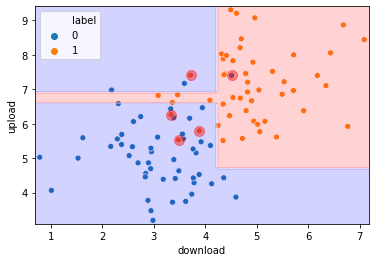

In [41]:
ax = sns.scatterplot(data=df, x='download', y='upload', hue='label');
ax.plot(wrong_pred[:, 0], wrong_pred[:, 1], 'or', markersize=10, alpha=0.4);
plot_decision_boundary(model, X, ax)

### Exercise 2

Use a different classifier. Replace the `DecisionTreeClassifier` with another classifier, e.g.:
- `LogisticRegression`
- `SVC`
- `RandomForestClassifier`

or any other model you can find here: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
and compare their behavior with the decision tree.

In [42]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model.score(X_train, y_train)

0.9125

In [45]:
model.score(X_test, y_test)

0.9

In [46]:
y_pred = model.predict(X)


In [47]:
confusion_matrix(y, y_pred)

array([[47,  3],
       [ 6, 44]])

In [48]:
wrong_pred = X[y != y_pred]

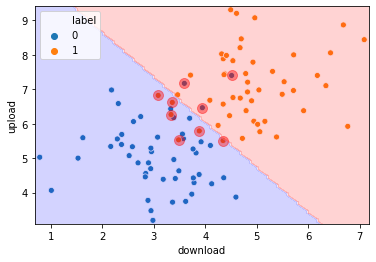

In [49]:
ax = sns.scatterplot(data=df, x='download', y='upload', hue='label');
ax.plot(wrong_pred[:, 0], wrong_pred[:, 1], 'or', markersize=10, alpha=0.4);
plot_decision_boundary(model, X, ax)

In [50]:
from sklearn.linear_model import SGDClassifier

In [51]:
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
model.score(X_train, y_train)

0.85

In [53]:
model.score(X_test, y_test)

0.9

In [54]:
y_pred = model.predict(X)

In [55]:
confusion_matrix(y, y_pred)

array([[36, 14],
       [ 0, 50]])

In [56]:
wrong_pred = X[y != y_pred]

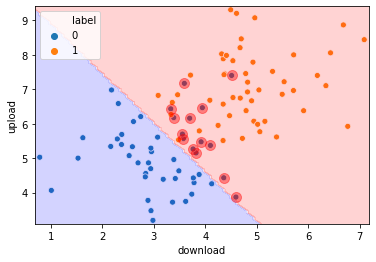

In [57]:
ax = sns.scatterplot(data=df, x='download', y='upload', hue='label');
ax.plot(wrong_pred[:, 0], wrong_pred[:, 1], 'or', markersize=10, alpha=0.4);
plot_decision_boundary(model, X, ax)

In [58]:
#random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [59]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
model.score(X_train, y_train)

1.0

In [61]:
model.score(X_test, y_test)

0.95

In [62]:
y_pred = model.predict(X)

In [63]:
confusion_matrix(y, y_pred)

array([[50,  0],
       [ 1, 49]])

In [64]:
wrong_pred = X[y != y_pred]

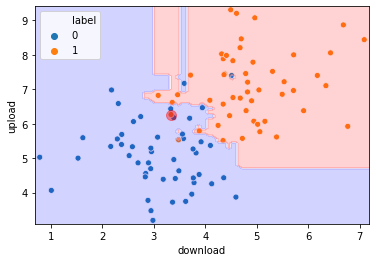

In [65]:
ax = sns.scatterplot(data=df, x='download', y='upload', hue='label');
ax.plot(wrong_pred[:, 0], wrong_pred[:, 1], 'or', markersize=10, alpha=0.4);
plot_decision_boundary(model, X, ax)

## Clustering

In [66]:
df = pd.read_csv(url + '/iris.csv')

In [67]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


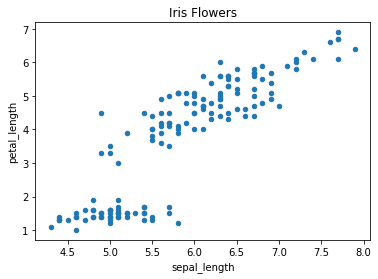

In [68]:
df.plot.scatter(x='sepal_length', y='petal_length', title='Iris Flowers');

In [69]:
X = df.drop('species', axis=1).values

In [70]:
from sklearn.cluster import KMeans

In [71]:
model = KMeans(2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
centers = model.cluster_centers_
centers

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

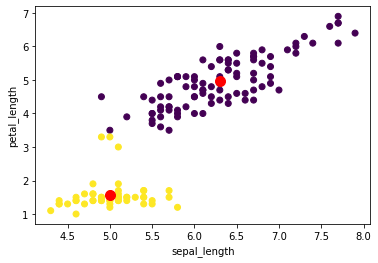

In [73]:
plt.scatter(df.sepal_length, df.petal_length, c=model.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('sepal_length')
plt.ylabel('petal_length');